# Australian Shark Attacks

## Data Dictionary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
shark_data = pd.read_feather("Australian Shark Database.feather")
shark_data

,incident_month,incident_year,victim_injury,state,location,shark_common_name,provoked/unprovoked,victim_activity,victim_gender,shark_behaviour,injury_location,victim_age
0,January,1791,fatal,New South Wales,near sydney,white shark,unprovoked,swimming,female,None,torso,NaN
1,January,1807,injured,New South Wales,"cockle bay, sydney harbour",bull shark,unprovoked,swimming,male,bit victim on wrist,"arm, hand",NaN
2,January,1825,injured,New South Wales,"kirribili point, sydney harbour",bull shark,unprovoked,swimming,male,bit legs,leg,15.0
3,January,1832,injured,New South Wales,"blackwattle bay, glebe, sydney harbour",bull shark,provoked,swimming,male,bit victim on leg,leg,NaN
4,June,1832,injured,New South Wales,"south head, sydney harbour",white shark,provoked,fishing,female,bit victim on leg,leg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1191,July,2003,uninjured,Northern Territory,"nhulunbuy, bremmer island",tiger shark,unprovoked,unmotorised boating,male,bit kayak,other: uninjured,37.0
1192,April,2005,injured,Northern Territory,"nhulunbuy, bremmer island",whaler shark,provoked,spearfishing,male,bit victim on head,head,20.0
1193,September,2018,injured,Northern Territory,"groote eylandt, arnhem land (east)",bull shark,unprovoked,None,male,None,None,17.0
1194,November,2018,injured,Northern Territory,nhulunbuy,whaler shark,provoked,spearfishing,male,None,"arm, leg",17.0


Let's get some insight about the data. we first, look at the numerical columns of the dataset.

In [3]:
shark_data.describe()

,incident_year,victim_age
count,1196.000000,699.000000
mean,1966.895485,28.164521
std,48.260971,13.794858
min,1791.000000,0.000000
25%,1931.000000,17.000000
50%,1983.000000,25.000000
75%,2010.000000,36.000000
max,2022.000000,84.000000


From the above result, we can easily see that --
- The average age of the victim is 28 years and the maximum age of a victim is 84 years. I think maximum shark attacks happened to the oldest fishermen. we will verify this fact later.
- The minimum age of a victim is 0 which is definitely an error. we have to check that.
- For the **incident_year** column, the statistical summary don't make sense. We have to see this column's statistical summary by converting the column to categorical.

In [4]:
shark_data_copy = shark_data.copy()
shark_data_copy['incident_year'] = shark_data_copy['incident_year'].astype('object')
shark_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_month       1196 non-null   object 
 1   incident_year        1196 non-null   object 
 2   victim_injury        1196 non-null   object 
 3   state                1196 non-null   object 
 4   location             1193 non-null   object 
 5   shark_common_name    1144 non-null   object 
 6   provoked/unprovoked  1192 non-null   object 
 7   victim_activity      1171 non-null   object 
 8   victim_gender        1179 non-null   object 
 9   shark_behaviour      980 non-null    object 
 10  injury_location      1066 non-null   object 
 11  victim_age           699 non-null    float64
dtypes: float64(1), object(11)
memory usage: 121.5+ KB


In [5]:
shark_data_copy.describe(include='O')

,incident_month,incident_year,victim_injury,state,location,shark_common_name,provoked/unprovoked,victim_activity,victim_gender,shark_behaviour,injury_location
count,1196,1196,1196,1196,1193,1144,1192,1171,1179,980,1066
unique,12,176,4,7,909,22,2,10,2,271,63
top,January,2020,injured,New South Wales,"thursday island, torre strait",white shark,unprovoked,swimming,male,bit victim on leg,leg
freq,223,37,722,438,20,361,794,452,1062,241,213


From the above result, we can observe that --
- Maximum incident happened in **January**.
- Shark incidents mostly recorded in the year **2020**.
- **722 person out of 1196** were injured in shark attacks.
- Most of the shark attacks were reported from the **New South Wales** state of Australia.
- Most attacks are done by **White Shark**. If you search in the internet, you will see that **White Shark  is responsible for by far the largest number of recorded shark bite incidents on humans**. below is the picture which prove the statement.

<center><img src='Screenshot (297).png'></center>

- Most shark attacks are **unprovoked** and happened while **swimming**.
- Most victim's gender is **male** and they got injury mostly in their **legs**.

## Is the shark attacks are increasing over years in Australia?
Here we are going to see that the shark attacks are increasing over years or not. To know this, we don't need all the years from the table. So, I selected the count of data from 1998 to 2022 and plot a graph on it.

In [6]:
year_count = shark_data['incident_year'].value_counts() \
                                        .rename_axis('incident_year') \
                                        .reset_index(name='count')
kamor_increase = year_count[year_count['incident_year'] >= 1998].sort_values(by='incident_year')

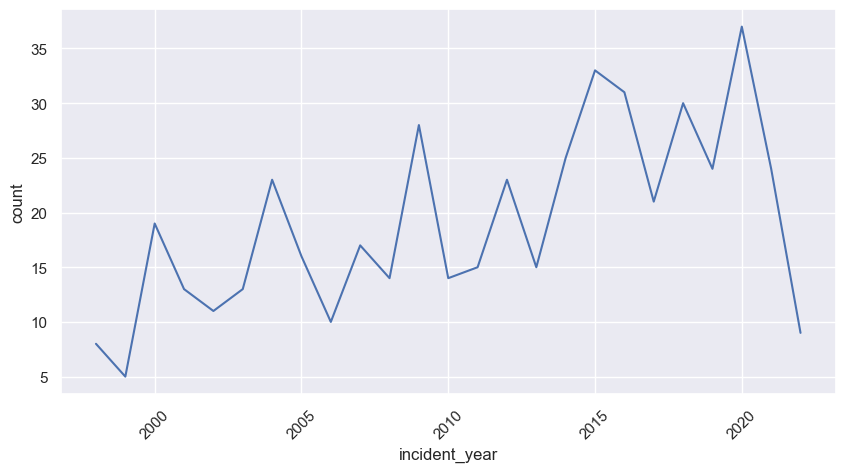

In [7]:
plt.figure(figsize=(10,5))
sns.set()
# sns.barplot(x='incident_year', y='count', data=kamor_increase)
sns.lineplot(x='incident_year', y='count', data=kamor_increase)
plt.xticks(rotation=45)
plt.show()

From the above result, we can see an increasing trend which clearly tells that the shark attacks are increasing.

In [8]:
white_shark_case = shark_data[shark_data['shark_common_name']=='white shark']
white_shark_case

,incident_month,incident_year,victim_injury,state,location,shark_common_name,provoked/unprovoked,victim_activity,victim_gender,shark_behaviour,injury_location,victim_age
0,January,1791,fatal,New South Wales,near sydney,white shark,unprovoked,swimming,female,None,torso,NaN
4,June,1832,injured,New South Wales,"south head, sydney harbour",white shark,provoked,fishing,female,bit victim on leg,leg,NaN
17,November,1875,injured,New South Wales,"yamba, clarence river heads, lluka beach",white shark,provoked,swimming,male,bit foot,foot,NaN
24,November,1879,injured,New South Wales,"yamba, clarence river heads, lluka beach",white shark,unprovoked,swimming,male,bit victim on leg,thigh,15.0
28,April,1882,fatal,New South Wales,lake macquarie heads,white shark,unprovoked,None,male,bit victim on torso,torso,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1168,July,2013,injured,Victoria,flinders,white shark,unprovoked,swimming,male,bit victim on back,"arm, hand",29.0
1169,March,2014,uninjured,Victoria,"winkipop, bell's beach",white shark,unprovoked,boarding,male,bumped victim & board,other: uninjured,42.0
1170,July,2015,injured,Victoria,tyrendarra beach,white shark,unprovoked,boarding,male,bit rear of surfboard,"arm, hand",40.0
1171,September,2016,uninjured,Victoria,"bells beach, winkipop reef",white shark,unprovoked,boarding,male,None,None,NaN


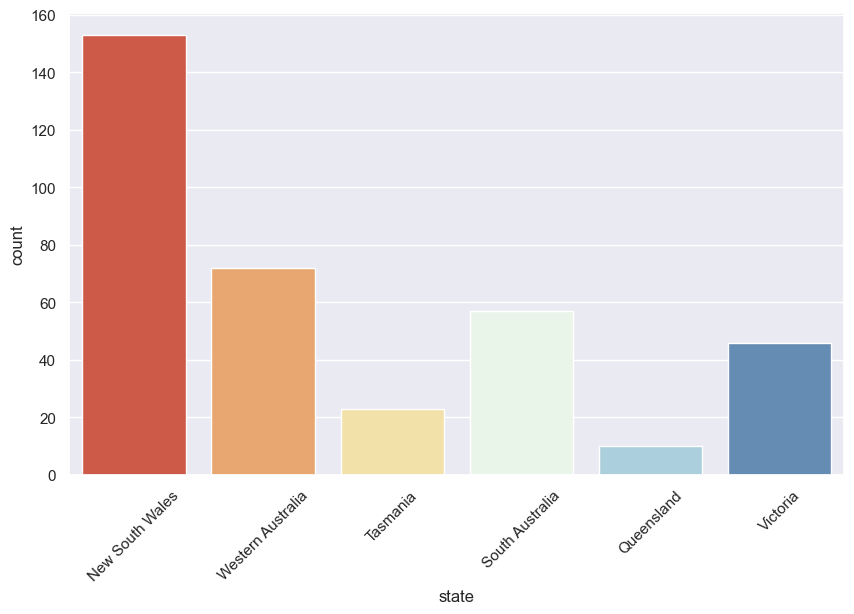

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=white_shark_case, palette='RdYlBu')
plt.xticks(rotation=45)
plt.show()

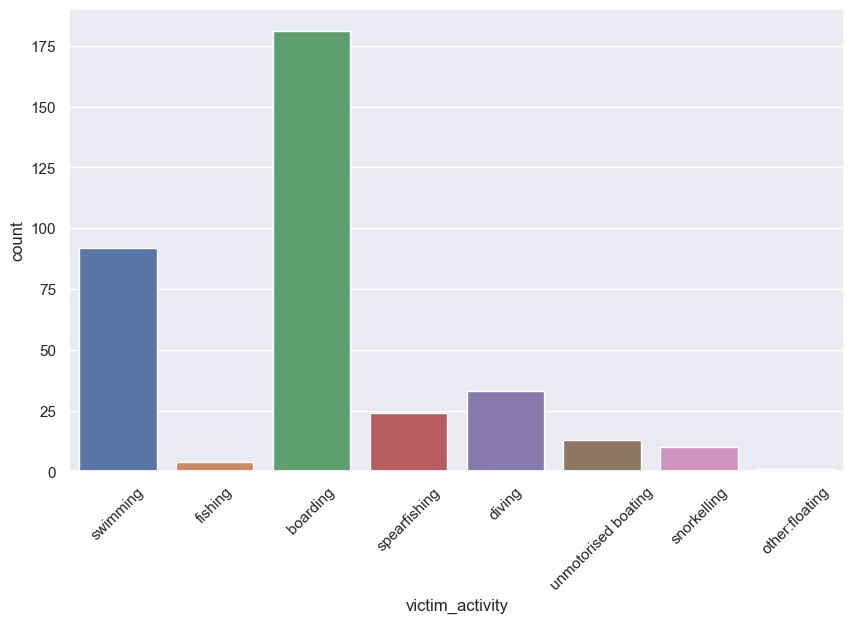

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='victim_activity',data=white_shark_case)
plt.xticks(rotation=45)
plt.show()

In [11]:
white_shark_case[white_shark_case['state']=='New South Wales'].location.value_counts()

maroubra beach, sydney            4
newcastle beach                   4
merewether beach, newcastle       4
coogee beach, sydney              4
lennox head                       4
                                 ..
tweed heads, fingal               1
ballina south, half tide beach    1
norah head                        1
byron bay, suffolk park  beach    1
little bay, sydney                1
Name: location, Length: 118, dtype: int64

In [12]:
shark_data.shark_common_name.unique()

array(['white shark', 'bull shark', 'whaler shark', 'wobbegong',
       'tiger shark', 'dusky shark', 'bronze whaler shark', 'dogfish',
       'grey nurse shark', 'galapagos shark', 'blind shark', None,
       'shortfin mako shark', 'grey reef shark', 'whitetip reef shark',
       'blacktip reef shark', 'lemon shark', 'broadnose sevengill shark',
       'school shark', 'hammerhead shark ', 'silvertip shark',
       'sevengill shark', 'port jackson shark'], dtype=object)

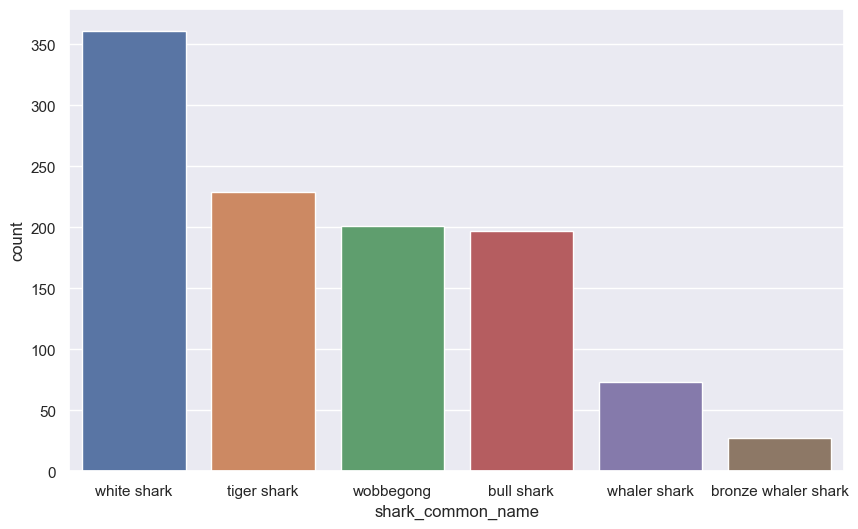

In [13]:
shark_incident_count = shark_data['shark_common_name'].value_counts() \
                                        .rename_axis('shark_common_name') \
                                        .reset_index(name='count')
second_shark = shark_incident_count[shark_incident_count['count'] >= 10]

plt.figure(figsize=(10, 6))
sns.barplot(x='shark_common_name', y='count', data=second_shark)
plt.show()

In [14]:
second_shark

,shark_common_name,count
0,white shark,361
1,tiger shark,229
2,wobbegong,201
3,bull shark,197
4,whaler shark,73
5,bronze whaler shark,27


In [15]:
wobbegong_shark_case = shark_data[shark_data['shark_common_name']=='wobbegong']
wobbegong_shark_case

,incident_month,incident_year,victim_injury,state,location,shark_common_name,provoked/unprovoked,victim_activity,victim_gender,shark_behaviour,injury_location,victim_age
10,November,1853,injured,New South Wales,sydney harbour,wobbegong,provoked,swimming,male,bit leg,leg,NaN
15,November,1874,injured,New South Wales,"redhead beach, newcastle",wobbegong,provoked,swimming,male,bit victim on foot,foot,NaN
22,November,1878,injured,New South Wales,"iron cove river, sydney harbour",wobbegong,unprovoked,swimming,male,bit victim,None,NaN
29,May,1882,injured,New South Wales,"miller's point, sydney harbour",wobbegong,unprovoked,swimming,male,bit victim on leg,calf,NaN
37,April,1891,uninjured,New South Wales,tathra wharf,wobbegong,provoked,diving,male,bit lead shoe,other: uninjured,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1141,February,1975,injured,Victoria,"soapys point, anglesea",wobbegong,provoked,snorkelling,male,bit victim on shoulder,"torso, shoulder",45.0
1150,November,1994,injured,Victoria,mornington peninsula (pier),wobbegong,provoked,diving,male,bit victim on body,torso,23.0
1153,December,1996,injured,Victoria,anglesea beach,wobbegong,unprovoked,boarding,female,bit victim on leg,leg,12.0
1162,February,2008,injured,Victoria,"shallow inlet, wilson's promontory",wobbegong,unprovoked,swimming,female,bit victim on foot,foot,66.0


In [16]:
wobbegong_shark_case["provoked/unprovoked"].value_counts()

unprovoked    101
provoked      100
Name: provoked/unprovoked, dtype: int64

In [17]:
tiger_shark_case = shark_data[shark_data['shark_common_name']=='tiger shark']
tiger_shark_case

,incident_month,incident_year,victim_injury,state,location,shark_common_name,provoked/unprovoked,victim_activity,victim_gender,shark_behaviour,injury_location,victim_age
16,July,1875,injured,New South Wales,"yamba, clarence river",tiger shark,unprovoked,swimming,male,bit victim,None,NaN
71,March,1918,injured,New South Wales,tweed heads,tiger shark,unprovoked,swimming,male,bit leg,leg,NaN
93,January,1927,fatal,New South Wales,"greys point, port hacking",tiger shark,unprovoked,swimming,male,bit victim on body,thigh,15.0
130,January,1940,fatal,New South Wales,"botany bay, brighton-le-sands",tiger shark,unprovoked,swimming,male,bit victim on leg,"torso, leg",13.0
133,December,1940,fatal,New South Wales,"stockton beach, newcastle",tiger shark,unprovoked,swimming,male,None,torso,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,January,1943,injured,Northern Territory,darwin,tiger shark,unprovoked,swimming,male,bit victim on back,torso,NaN
1185,July,1947,uninjured,Northern Territory,darwin harbour,tiger shark,provoked,diving,male,None,other: uninjured,NaN
1186,September,1984,injured,Northern Territory,port keats,tiger shark,unprovoked,other: standing in water,female,bit victim when startled,"arm, head, torso",27.0
1190,December,1989,injured,Northern Territory,"gove peninsula, cape wirrawoi",tiger shark,provoked,swimming,male,bit victim on leg,leg,17.0


In [18]:
tiger_shark_case["provoked/unprovoked"].value_counts()

unprovoked    125
provoked      104
Name: provoked/unprovoked, dtype: int64

In [19]:
white_shark_case["provoked/unprovoked"].value_counts()

unprovoked    298
provoked       63
Name: provoked/unprovoked, dtype: int64

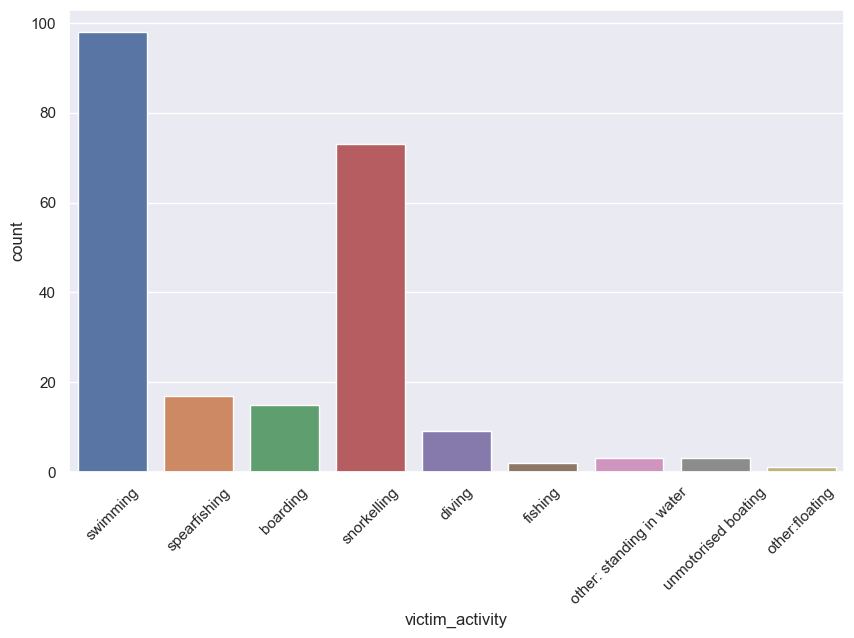

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='victim_activity',data=tiger_shark_case)
plt.xticks(rotation=45)
plt.show()

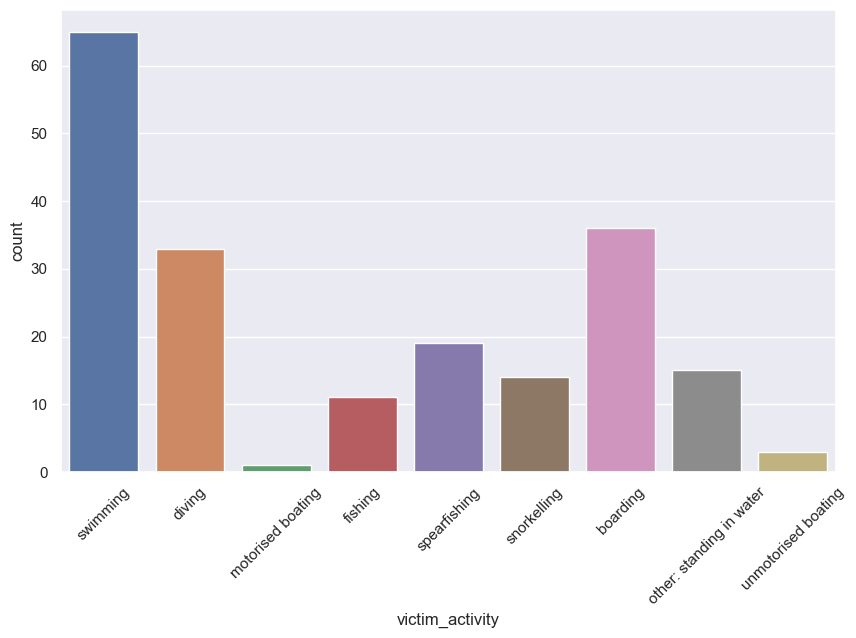

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='victim_activity',data=wobbegong_shark_case)
plt.xticks(rotation=45)
plt.show()

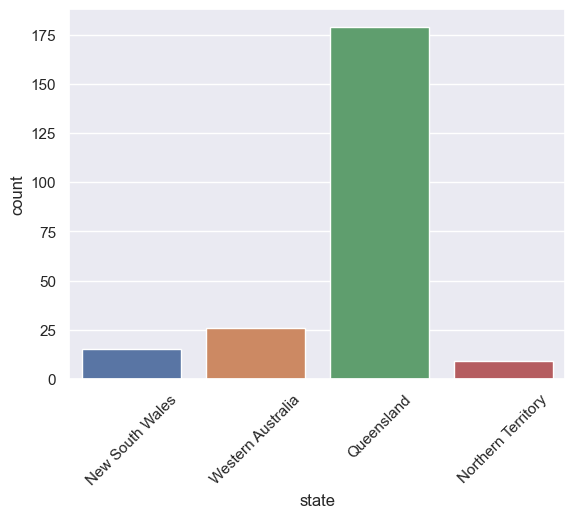

In [22]:
sns.countplot(x='state', data=tiger_shark_case)
plt.xticks(rotation=45)
plt.show()

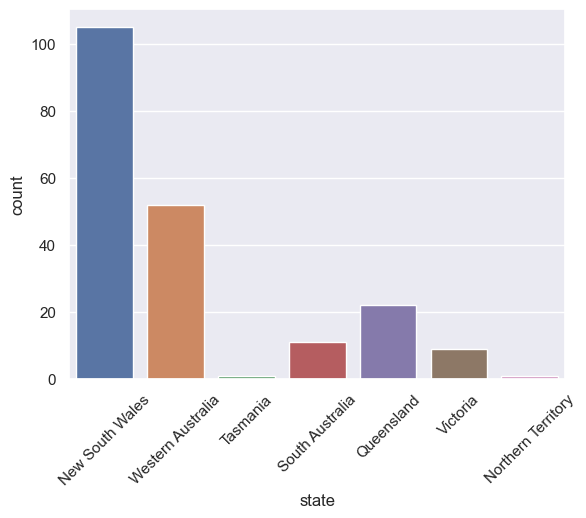

In [23]:
sns.countplot(x='state', data=wobbegong_shark_case)
plt.xticks(rotation=45)
plt.show()

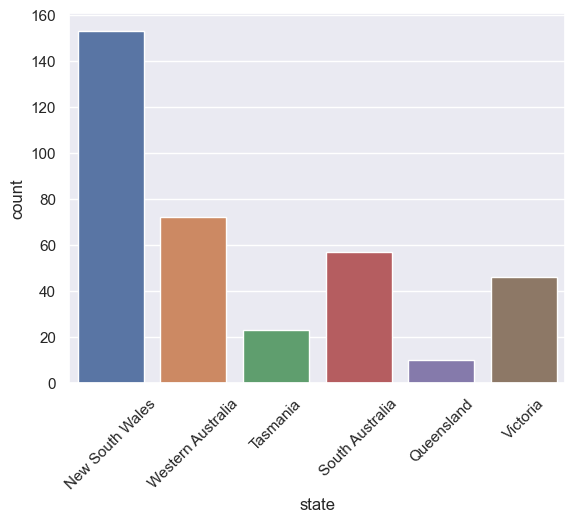

In [24]:
sns.countplot(x='state', data=white_shark_case)
plt.xticks(rotation=45)
plt.show()

In [25]:
white_shark_case['victim_injury'].value_counts()

injured      166
uninjured    103
fatal         91
Injured        1
Name: victim_injury, dtype: int64

In [26]:
wobbegong_shark_case['victim_injury'].value_counts()

injured      191
uninjured     10
Name: victim_injury, dtype: int64

In [28]:
tiger_shark_case['victim_injury'].value_counts()

injured      115
fatal         86
uninjured     28
Name: victim_injury, dtype: int64

In [33]:
shark_data['victim_injury'].value_counts().values

array([722, 250, 223,   1], dtype=int64)

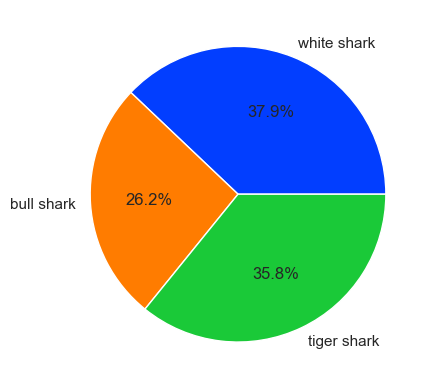

In [47]:
fatal_cases = {}
sharks = [x for x in shark_data['shark_common_name'].unique() if x is not None]

for shark in sharks:
    data = shark_data['shark_common_name']== shark
    fatal = shark_data['victim_injury']== 'fatal'
    fatal_num = shark_data[data & fatal].shape[0]
    if fatal_num <= 10:
        pass
    else:
        fatal_cases[shark] = fatal_num

palette_color = sns.color_palette('bright')
plt.pie(data=list(fatal_cases.values()),
        labels=list(fatal_cases.keys()),
        x=list(fatal_cases.values()),
        autopct='%.1f%%',
        colors=palette_color
        )
plt.show()